<a href="https://colab.research.google.com/github/ErycaFMS/introduction-to-data-science/blob/main/06_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introdução**

**Algoritmo kNN e métricas de avaliação de algoritmos de classificação binária**

Classificação binária utilizando o algoritmo k-Nearest Neighbors (kNN). Vamos criar um conjunto de dados sintéticos para classificar "Frutas" em duas categorias: "Maçã" e "Laranja". As características serão baseadas em medidas simplificadas, como "Peso" e "Diâmetro".

Aqui está um passo a passo:

Exemplo: Classificação de Frutas (Maçã vs Laranja) usando kNN

Criando o Conjunto de Dados Sintéticos
Vamos gerar um conjunto de dados sintéticos com duas características: "Peso" e "Diâmetro". Usaremos make_classification da biblioteca sklearn para isso.

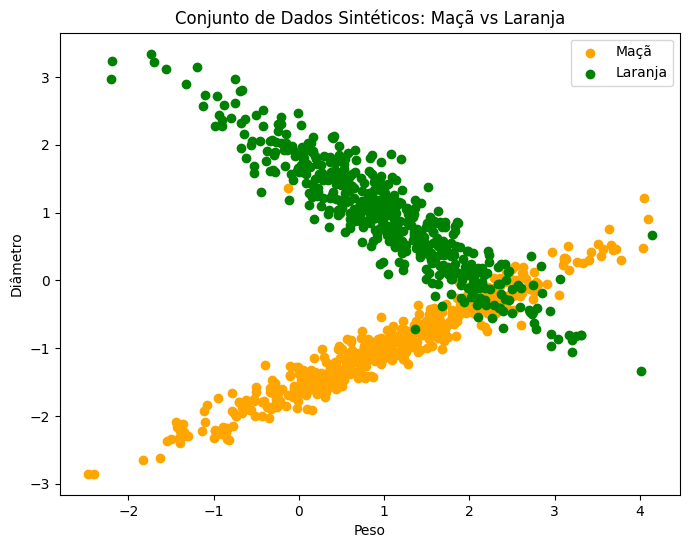

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Criar o conjunto de dados sintéticos
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Convertendo para DataFrame para visualização
df = pd.DataFrame(X, columns=['Peso', 'Diâmetro'])
df['Fruta'] = y

# Visualizar o conjunto de dados
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Fruta'] == 0]['Peso'], df[df['Fruta'] == 0]['Diâmetro'], color='orange', label='Maçã')
plt.scatter(df[df['Fruta'] == 1]['Peso'], df[df['Fruta'] == 1]['Diâmetro'], color='green', label='Laranja')
plt.xlabel('Peso')
plt.ylabel('Diâmetro')
plt.legend()
plt.title('Conjunto de Dados Sintéticos: Maçã vs Laranja')
plt.show()


2. Dividindo, treinando e testando o Conjunto de Dados

In [ ]:
# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o classificador kNN
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)



3. Aplicando Métricas de Avaliação

Matriz de Confusão

A matriz de confusão já foi exibida acima. Ela mostra os números de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

Matriz de Confusão:
[[141   6]
 [ 13 140]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       147
           1       0.96      0.92      0.94       153

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



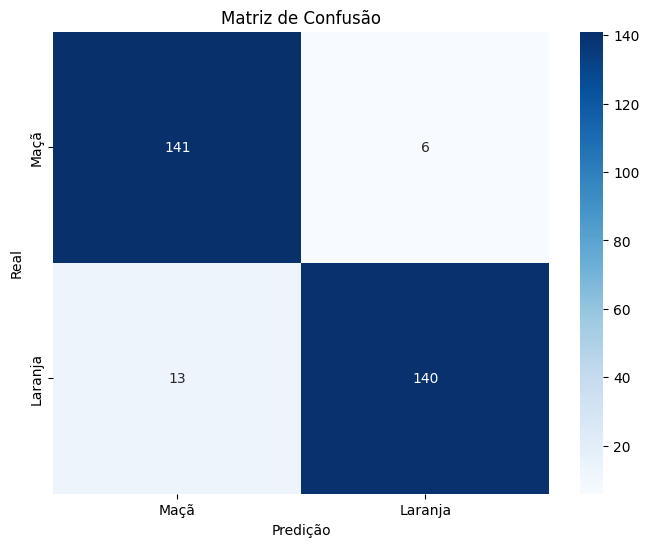

In [ ]:
# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(conf_matrix)
print()

print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# Função para visualizar a matriz de confusão
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

# Visualizar a matriz de confusão
labels = ['Maçã', 'Laranja']
plot_confusion_matrix(conf_matrix, labels)


Curva ROC e AUC

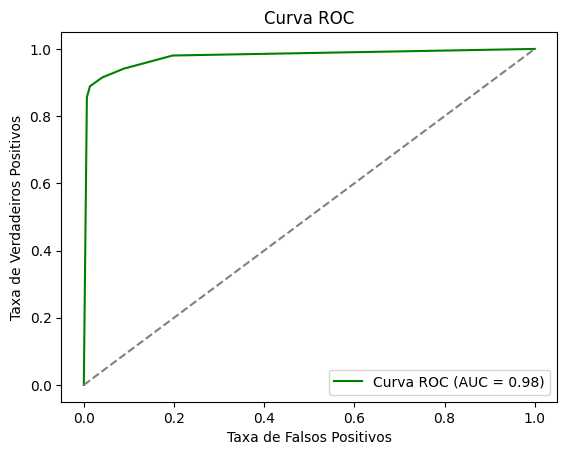

In [ ]:
# Calcular e plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color='green', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

Erro em Função do k

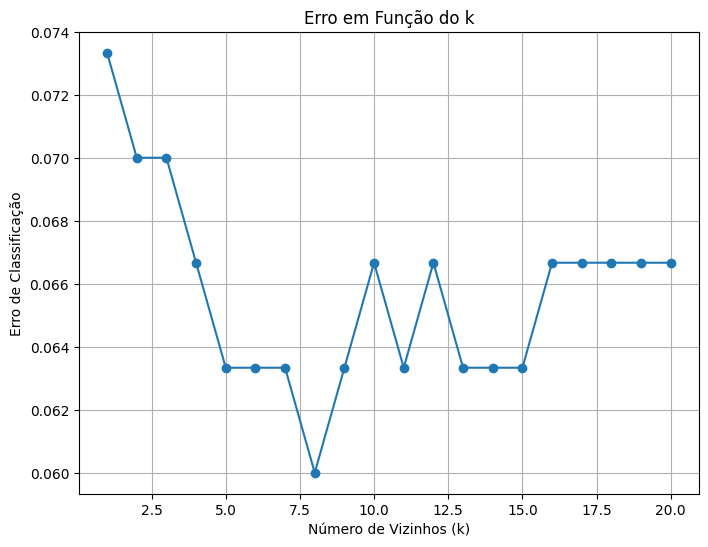

In [ ]:
# Testar diferentes valores de k
k_values = range(1, 21)
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8, 6))
plt.plot(k_values, errors, marker='o')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Erro de Classificação')
plt.title('Erro em Função do k')
plt.grid(True)
plt.show()

Fronteira de Decisão

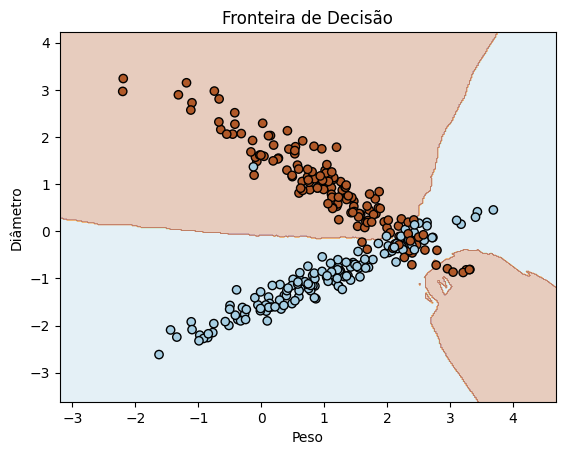

In [ ]:
# Função para plotar a fronteira de decisão
def plot_decision_boundary(clf, X, y, title='Fronteira de Decisão'):
    h = .02  # Tamanho do passo na malha
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.Paired)
    plt.xlabel('Peso')
    plt.ylabel('Diâmetro')
    plt.title(title)
    plt.show()

# Plotar a fronteira de decisão para o classificador kNN
plot_decision_boundary(knn, X_test, y_test)


4. Conclusão

Neste notebook, criamos um conjunto de dados sintético para a classificação binária entre Maçã e Laranja usando o algoritmo k-Nearest Neighbors (kNN).

Dividimos os dados em conjuntos de treino e teste, treinamos o modelo e avaliamos seu desempenho com a matriz de confusão e o relatório de classificação. A visualização da matriz de confusão revelou a distribuição das previsões do modelo. Com base nas métricas de desempenho, observamos a eficácia do modelo e discutimos a importância da escolha do parâmetro k. O modelo kNN mostrou-se adequado para a tarefa, ajustes no valor de k podem otimizar ainda mais a performance.